In [2]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

apps = pd.read_csv("~/python/Workouts_Notes/Projects/Android_App/datasets/apps.csv", index_col=0)
# print(apps.head())

# drop duplicates

print("\n--------- 1. Print the 5 samples of the header -----")
apps = apps.drop_duplicates(subset='App')
print(apps.sample(5))


######### 2. Clean the dtable
cleancols = ['Installs', 'Price', 'Size']
delchars = ['$', ',', '+', 'M', 'k', ]


# print(apps[apps['Size'].isin(['19M', '20M'])])
apps = apps.dropna()
print("\n--------------------------------")
print(apps[apps['Size'].str.contains("M")])

for col in cleancols:

    for char in delchars:
        apps[col] =  apps[col].str.replace(char,'')

    apps[col] = pd.to_numeric(apps[col])

print("\n -------- 2 Show values if it is already in numeric form ---")
print(apps.info())

# ############   3. Visualization of Categories #########################

# Print the total number of unique categories

print(len(apps['Category'].unique()))

print("\n ---------  Average ratings of the apps")
cat = apps['Category'].value_counts()
print(cat)

data = go.Bar(x=cat.index, y=cat.values)

layout = go.Layout(
    title = dict(
        text = 'Number of Apps per Categories',
        x = 0.5,
        xanchor = 'center'
    ),
    yaxis = dict(
        title = "Count"
    ),
    xaxis = dict(
        title = "Category"
    )
)

Fig = go.Figure(data,layout)
pyo.plot(Fig)

# ########### 4. Distribution of App ratings  ##########3333

print("\n ---------  4. App Ratings -------------")
avg_rating = apps['Rating'].mean()
print(avg_rating)

data = go.Histogram(x=apps['Rating'])

layout = go.Layout(
    title = dict(
        text = "App Rating Distribution",
        xanchor = 'center',
        x = 0.5
    ),
    xaxis = dict(
        title = "App Ratings"
    ),
    yaxis = dict(
        title = "Count"
    ),
    shapes = [dict(
        type = 'line',
        x0 = avg_rating,
        x1 = avg_rating,
        y0 = 0,
        y1 = 1000,
        line = dict(
            dash = 'dashdot'
        )
    )]

)

FigDist = go.Figure(data, layout)
pyo.plot(FigDist)


# ########### 5. Size and price of an app

popcat_apps = apps.groupby('Category').filter(lambda x: len(x) >= 250)


print("\n --------- 5. Size and Price of an app -----------")
print(popcat_apps.sample(5))
print(len(popcat_apps))

rating_VS_size = sns.jointplot(x=popcat_apps['Size'], y=popcat_apps['Rating'],kind='hex')
plt.title("App Ratings Vs Size")
## Paid App Analysis

paid_apps = apps[apps['Type'] == 'Paid']
print("\n------- List of Paid Apps --------")
print(paid_apps.sample(5))
print(len(paid_apps))

rating_VS_Price = sns.jointplot(x=paid_apps['Price'], y=paid_apps['Rating'])
plt.title('Rating vs Price')

plt.show()




--------- 1. Print the 5 samples of the header -----
                           App             Category  Rating  Reviews  Size  \
4332  EXO-L Amino for EXO Fans               SOCIAL     4.9     5677   67M   
7876                CT Lottery               FAMILY     3.8      271  8.3M   
6891               Philips Hue            LIFESTYLE     3.1    10006   53M   
7858     Learn CT Scan Of Head  BOOKS_AND_REFERENCE     4.1       10  5.7M   
9533       Exiled Kingdoms RPG               FAMILY     4.6    49210   99M   

        Installs  Type Price Content Rating             Genres   Last Updated  \
4332     50,000+  Free     0           Teen             Social  July 13, 2018   
7876     50,000+  Free     0           Teen      Entertainment  June 12, 2017   
6891  1,000,000+  Free     0       Everyone          Lifestyle  July 26, 2018   
7858      5,000+  Free     0       Everyone  Books & Reference  July 22, 2018   
9533  1,000,000+  Free     0   Everyone 10+       Role Playing   July 5,


 -------- 2 Show values if it is already in numeric form ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 10840
Data columns (total 13 columns):
App               7021 non-null object
Category          7021 non-null object
Rating            7021 non-null float64
Reviews           7021 non-null int64
Size              7021 non-null float64
Installs          7021 non-null int64
Type              7021 non-null object
Price             7021 non-null float64
Content Rating    7021 non-null object
Genres            7021 non-null object
Last Updated      7021 non-null object
Current Ver       7021 non-null object
Android Ver       7021 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 767.9+ KB
None
33

 ---------  Average ratings of the apps
FAMILY                 1511
GAME                    832
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               269
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY 

<Figure size 600x600 with 3 Axes>

<Figure size 600x600 with 3 Axes>

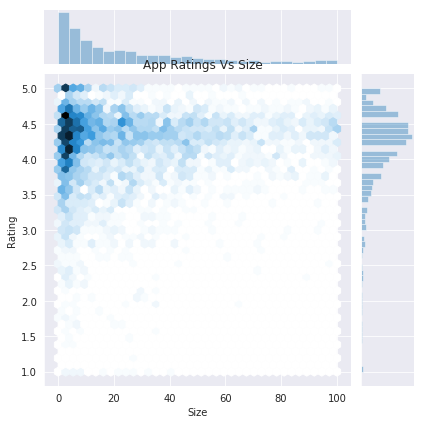

In [29]:
rating_VS_size = sns.jointplot(x=popcat_apps['Size'], y=popcat_apps['Rating'],kind='hex')
plt.title("App Ratings Vs Size", x=-3,y=5)
plt.show()
## Paid App Analysis

AttributeError: 'JointGrid' object has no attribute 'set_title'

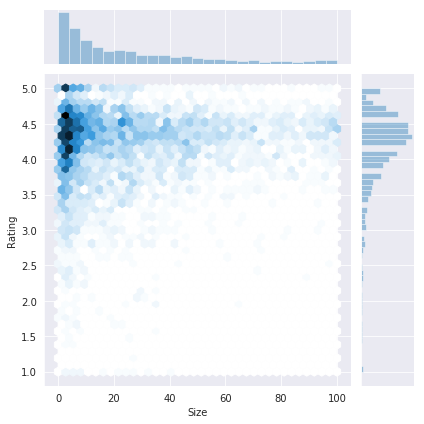

In [27]:
rating_VS_size = sns.jointplot(x=popcat_apps['Size'], y=popcat_apps['Rating'],kind='hex').set_title("LaLaLa")
plt.show()


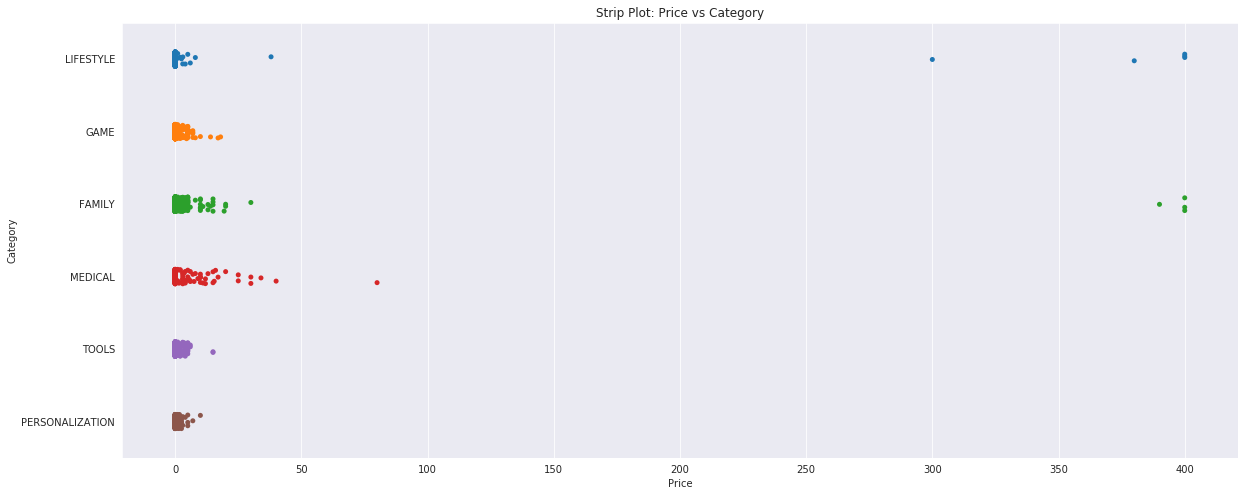

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
top6_catlist = ['FAMILY', 'GAME', 'TOOLS', 'PERSONALIZATION', 'LIFESTYLE', 'MEDICAL']
# top6_cats = apps[apps['Category'].isin(popcat_apps['Category'].unique())]
top6_cats = apps[apps['Category'].isin(top6_catlist)]
# print("\n ------ #6 Price vs Apps")
# print(top6_cats.sample(10))
price_vs_Cat = sns.stripplot(x=top6_cats['Price'], y=top6_cats['Category'])

plt.title("Strip Plot: Price vs Category")
plt.show()



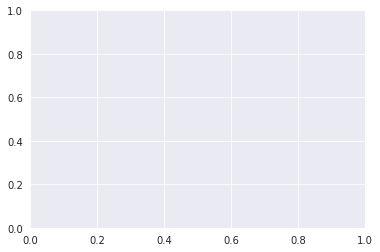

In [52]:
fig, axs = plt.subplots()

In [53]:
fig.set_size_inches(20, 10)

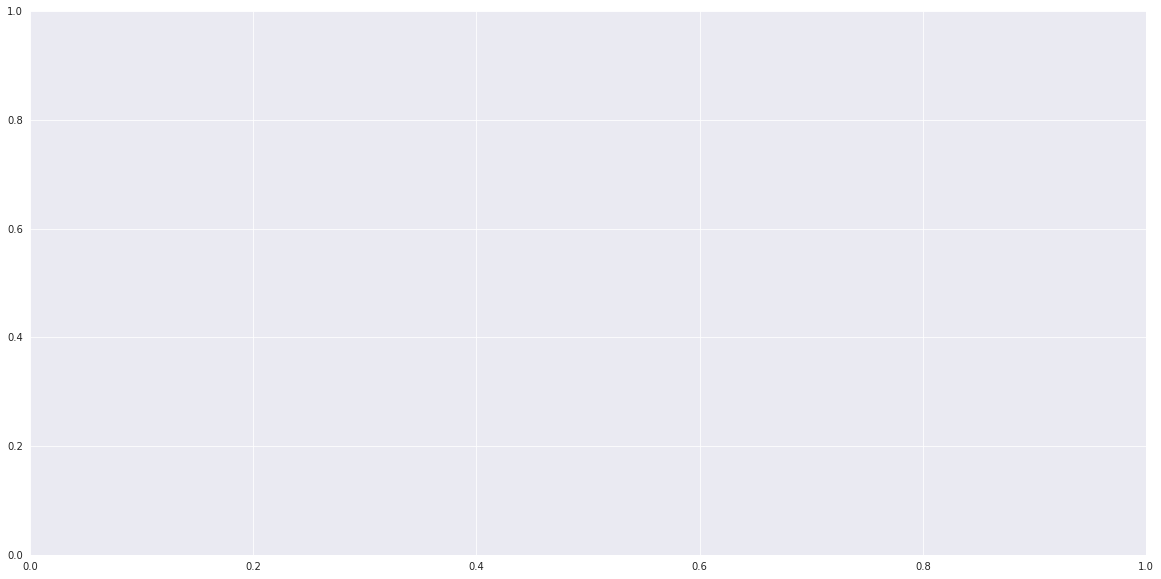

In [54]:
fig